# **Ejemplo** 2.1 Regresion Lineal

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,LinearRegression

from sklearn.metrics import r2_score
from sklearn import metrics

## **Dataset Diamonds Contexto**

El conjunto de datos que contiene los precios y otros atributos de casi 54 000 diamantes


*   carat: Peso en quilates del diamante (0.2--5.01)
*   cut: Calidad del corte
*   color: Color del diamante
*   clarity: Claridad una medida de cuan claro es el diamante
*   depth: Profundidad porcentaje de profundidad total = z / media (x, y) = 2 * z / (x + y) (43--79)
*   table: Ancho de la mesa de la parte superior del diamante
*   price: precio en dólares usd (326 - 18,823)
*   x: longitud
*   y: Ancho
*   z: Profundidad

## **1. Cargar datos**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mn-ariel/course_machine_learning/main/supervised%20learning/dataset/Credit.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [ ]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## **2. Limpiar datos**

In [ ]:
df.drop(columns='Unnamed: 0', axis = 1, inplace= True)

In [ ]:
def check_dates(cols):

    for col in cols:
        if df[col].dtype != 'O':
            print('Column',col,'with data continuos')
        else:
            df[col] = df[col].astype('category').cat.codes
            print('Column',col,'with data categorical')

In [ ]:
null_cols = df.columns.tolist()
check_dates(null_cols)

Column Income with data continuos
Column Limit with data continuos
Column Rating with data continuos
Column Cards with data continuos
Column Age with data continuos
Column Education with data continuos
Column Gender with data categorical
Column Student with data categorical
Column Married with data categorical
Column Ethnicity with data categorical
Column Balance with data continuos


In [ ]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,0,0,1,2,333
1,106.025,6645,483,3,82,15,1,1,1,1,903
2,104.593,7075,514,4,71,11,0,0,0,1,580
3,148.924,9504,681,3,36,11,1,0,0,1,964
4,55.882,4897,357,2,68,16,0,0,1,2,331


## **3. Codificar datos**

In [ ]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.517500,0.100000,0.61250,1.25000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,0.82717,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000,1.00000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.000000,0.000000,1.00000,1.00000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000,2.00000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,2.00000,1999.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


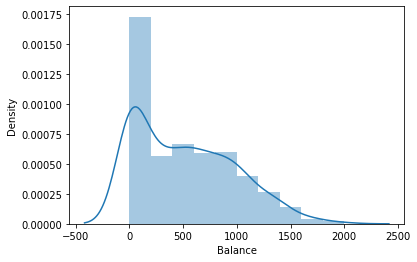

In [ ]:
sns.distplot(df.Balance)

In [ ]:
#df_ac = df.loc[df.Balance>0,].copy()
#df_ac.Balance.describe()

In [ ]:
#sns.distplot(df_ac.Balance)

In [ ]:
#df['Active'] = np.where(df['Balance']>0, '1', '0')
#df.Active.describe()

In [ ]:
#df_ac.info()

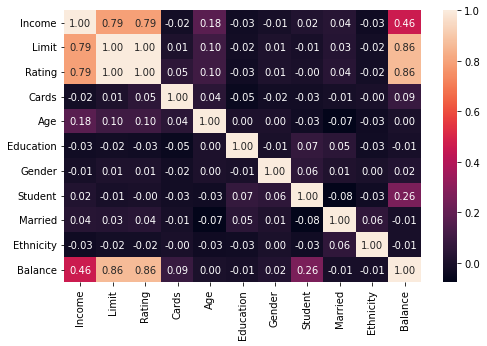

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax)

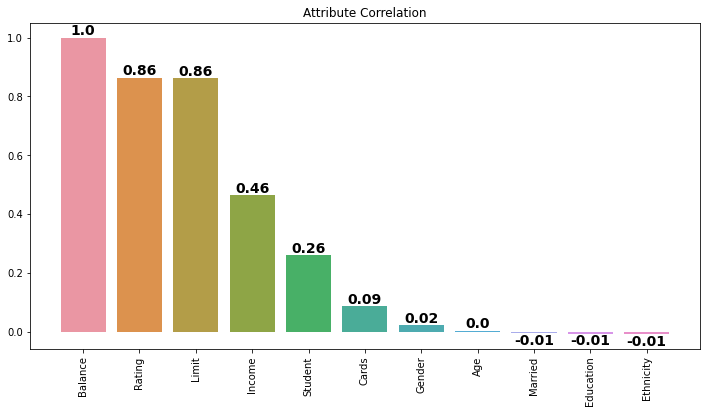

In [ ]:
corr_matrix = df.corr().round(3)
corr_target = corr_matrix['Balance'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=corr_target.index, y=corr_target.values, ax=ax)

ax.grid(False)
ax.set_title('Attribute Correlation')

plt.setp(ax.get_xticklabels(), rotation=90)

for n, x in enumerate(corr_target.index):
  if corr_target[n] >= 0:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=14, fontweight='bold')
  else:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='top',
            fontsize=14, fontweight='semibold')

ax.axis('tight')

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    int8   
 7   Student    400 non-null    int8   
 8   Married    400 non-null    int8   
 9   Ethnicity  400 non-null    int8   
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), int8(4)
memory usage: 23.6 KB


In [ ]:
x = df.drop(['Cards', 'Age', 'Education', 'Gender', 'Ethnicity', 'Married'], axis = 1)
y = df['Balance']

## **4. Imputar datos**
Para este no tenemos datos faltantes.

In [ ]:
print(x)

      Income  Limit  Rating  Student  Balance
0     14.891   3606     283        0      333
1    106.025   6645     483        1      903
2    104.593   7075     514        0      580
3    148.924   9504     681        0      964
4     55.882   4897     357        0      331
..       ...    ...     ...      ...      ...
395   12.096   4100     307        0      560
396   13.364   3838     296        0      480
397   57.872   4171     321        0      138
398   37.728   2525     192        0        0
399   18.701   5524     415        0      966

[400 rows x 5 columns]


In [ ]:
print(y)

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
regressor = LinearRegression()

In [ ]:
model = regressor.fit(x_train,y_train)

In [ ]:
y_pred = regressor.predict(x_test)

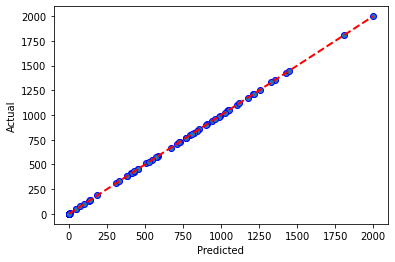

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', (metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 1.8125205889987603e-13
Mean Squared Error: 6.650090707201755e-26
R2 Score: 1.0


In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
233,0,2.443165e-13
40,50,5.000000e+01
379,0,3.476226e-14
168,0,1.826379e-13
310,1036,1.036000e+03
...,...,...
320,5,5.000000e+00
95,0,1.130520e-13
107,0,1.084432e-13
90,1023,1.023000e+03


In [ ]:
print('train score:',regressor.score(x_train,y_train))
print('test score:',regressor.score(x_test,y_test))

train score: 1.0
test score: 1.0
